# Mountain Car

## Init

In [1]:
import gym
import numpy as np
import sys
import time
import pickle

from agent import DDPG

task = gym.make('MountainCarContinuous-v0')
task.reset()
agent = DDPG(task)
scores = []

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## (Optional) Load model and metrics

In [2]:
# agent.load_model()
# with open("scores.pkl", "rb") as fh:
#     scores = pickle.load(fh)

## Sanity check for model structure

In [3]:
agent.actor_local.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
raw_actions (Dense)          (None, 1)                 301       
_________________________________________________________________
actions (Lambda)             (None, 1)                 0         
Total params: 121,801
Trainable params: 121,801
Non-trainable params: 0
_________________________________________________________________


In [4]:
agent.critic_local.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             (None, 2)            0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 400)          1200        states[0][0]                     
__________________________________________________________________________________________________
actions (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 300)          120300      dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (D

## Define training parameters

In [9]:
num_episodes = 500
last_episode = 1001

## Training

In [10]:
t0 = time.time()
for i_episode in range(last_episode, last_episode+num_episodes):
    state = agent.reset_episode() # start a new episode
    for i_step in range(200):
        action = agent.act(state) 
        next_state, reward, done, _ = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            break
    agent.best_score = max(agent.best_score, agent.score)
    scores.append(agent.score)
    print("\rEpisode = {:4d}, score = {:7.3f}, (best = {:7.3f})".format(
        i_episode, agent.score, agent.best_score), end="")  # [debug]
    sys.stdout.flush()
print()
t1 = time.time()
print("Total time: {:7} minutes".format((t1 - t0) // 60))
agent.save_model()
with open("scores.pkl", "wb") as fh:
    pickle.dump(scores, fh)

Episode = 1500, score =  48.651, (best =  90.269)
Total time:    18.0 minutes


## Results

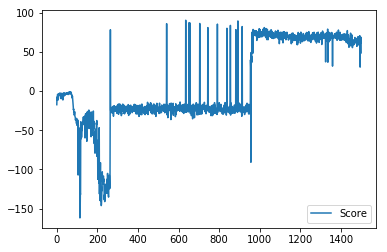

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(range(len(scores))), scores, label='Score')
plt.legend()
_ = plt.ylim()

/usr/local/google/home/peizhao/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


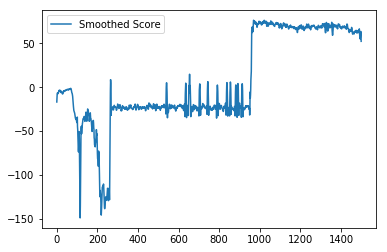

In [12]:
from scipy.signal import savgol_filter

smoothed_scores = savgol_filter(scores, 9, 3)
plt.plot(list(range(len(smoothed_scores))), smoothed_scores, label='Smoothed Score')
plt.legend()
_ = plt.ylim()